# CASE STUDY 2: REAL ESTATE PRICE PREDICTION (REGRESSION)

## Task 1: Data Loading and Exploration

##### **Load dataset and check for missing values, outliers**

In [ ]:
import pandas as pd
df = pd.read_csv("/Users/hafizmohammedaahil/Documents/University-Related-Stuff/SEM-5/Lab/Machine-Learning/ML_LAB1_Assignment/house_price_data.csv")
print("Shape:", df.shape)
df.head()
missing = df.isnull().sum()
missing[missing > 0]
df.describe().T

Shape: (8000, 25)


,count,mean,std,min,25%,50%,75%,max
distance_to_city_center,8000.0,3.785213,3.953137,0.5,1.000,2.5,5.100,25.0
distance_to_metro,8000.0,337.536250,350.469891,50.0,94.750,221.0,455.000,3000.0
distance_to_school,8000.0,148.724875,165.435271,30.0,35.000,90.0,194.000,1748.0
crime_rate,8000.0,1.000000,0.000000,1.0,1.000,1.0,1.000,1.0
house_age,8000.0,14.295125,14.677669,0.0,4.000,10.0,20.000,100.0
total_area,8000.0,150.608125,83.534599,50.0,86.000,134.0,196.000,500.0
bedrooms,8000.0,3.359500,1.129345,1.0,3.000,3.0,4.000,6.0
bathrooms,8000.0,2.502875,0.802074,1.0,2.000,3.0,3.000,4.0
floors,8000.0,1.808250,0.600231,1.0,1.000,2.0,2.000,3.0
garage,8000.0,0.698000,0.459154,0.0,0.000,1.0,1.000,1.0


##### **Quick Outlier Check (for numeric features)**

In [5]:
# quick check on data types
print("Data types:")
df.info()
# check how many unique values per column
print("\nUnique values per column:")
df.nunique().sort_values()


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-null   int64  
 14  balcony     

crime_rate                    1
garden                        2
air_conditioning              2
balcony                       2
basement                      2
garage                        2
floors                        3
heating_type                  3
construction_quality          3
renovation_status             3
season_sold                   4
bathrooms                     4
parking_spaces                4
year_sold                     4
bedrooms                      6
energy_efficiency             7
neighborhood                 15
house_age                    96
listing_duration            172
distance_to_city_center     220
total_area                  401
distance_to_school          713
distance_to_metro          1213
sale_price                 4651
property_id                8000
dtype: int64

## Task 2: Exploratory Data Analysis

##### **Analyse price distribution and check for skewness**

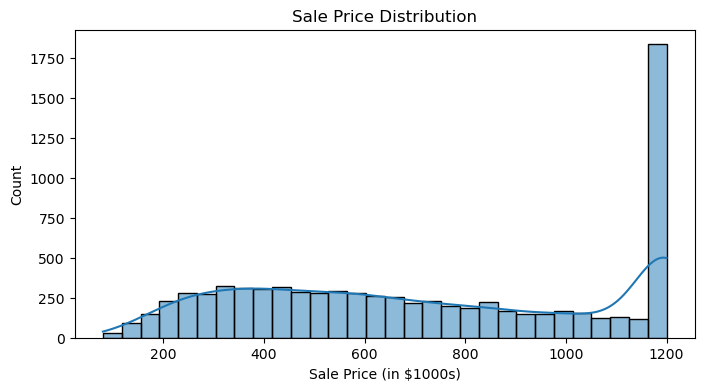

Skewness of sale price: 0.07298660946751669


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Plot distribution of sale price
plt.figure(figsize=(8, 4))
sns.histplot(df['sale_price'], kde=True, bins=30)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price (in $1000s)")
plt.ylabel("Count")
plt.show()

# Check skewness
skewness = skew(df['sale_price'])
print("Skewness of sale price:", skewness)

##### **Analyse price distribution and check for skewness**

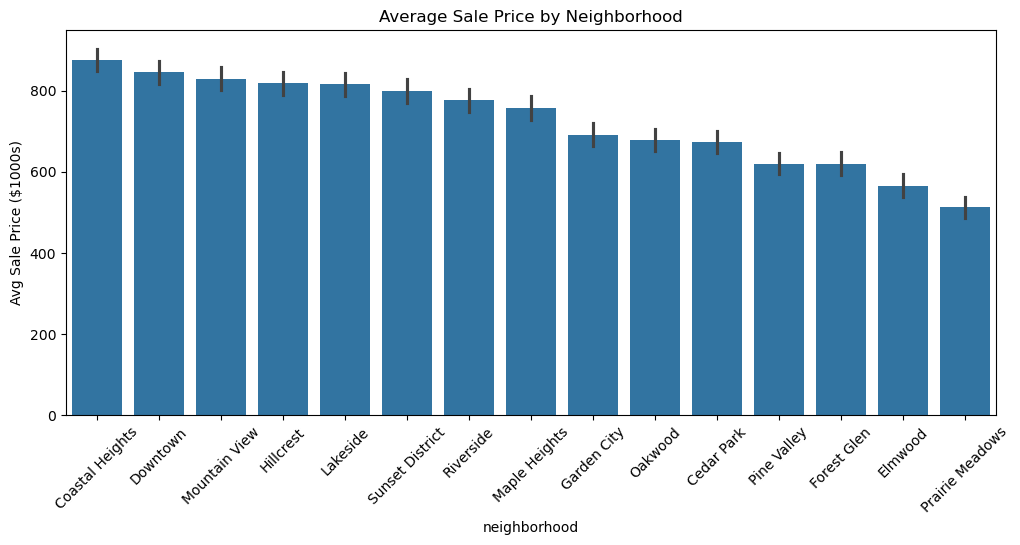

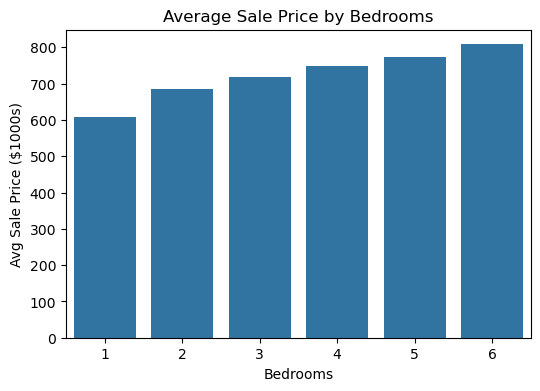

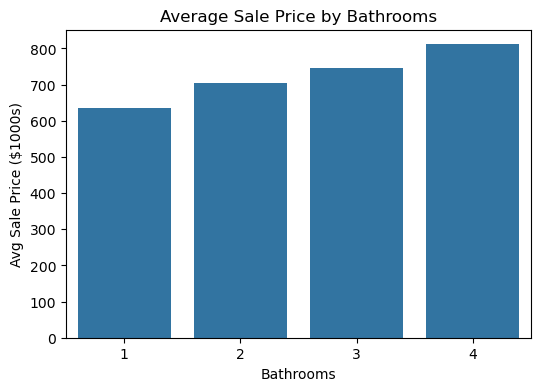

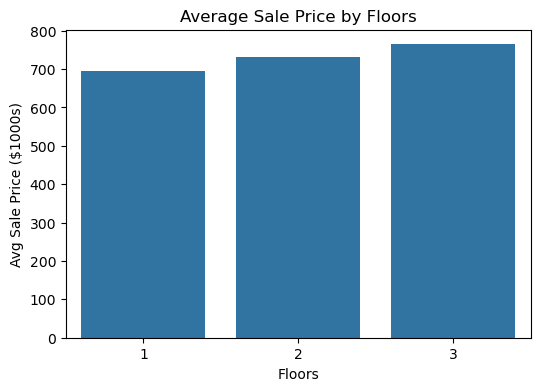

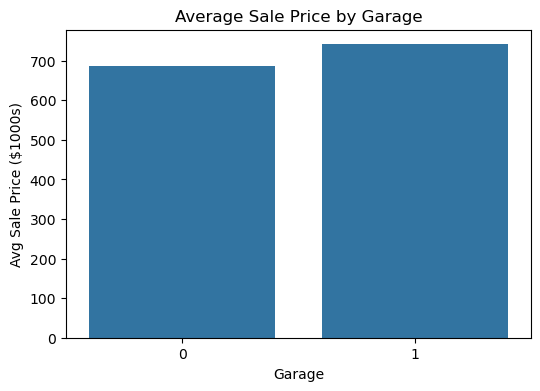

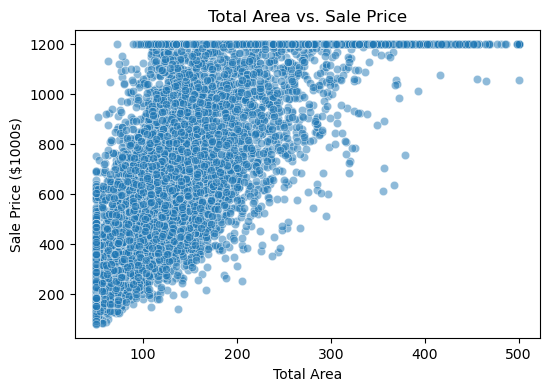

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# A. Location Impact — Use barplot (mean sale price per neighborhood)
plt.figure(figsize=(12, 5))
neigh_order = df.groupby('neighborhood')['sale_price'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='neighborhood', y='sale_price', order=neigh_order)
plt.xticks(rotation=45)
plt.title("Average Sale Price by Neighborhood")
plt.ylabel("Avg Sale Price ($1000s)")
plt.show()

# B. Property Features — Use barplots for discrete numeric features
features = ['bedrooms', 'bathrooms', 'floors', 'garage']

for feature in features:
    plt.figure(figsize=(6, 4))
    avg_prices = df.groupby(feature)['sale_price'].mean().reset_index()
    sns.barplot(data=avg_prices, x=feature, y='sale_price')
    plt.title(f"Average Sale Price by {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Avg Sale Price ($1000s)")
    plt.show()

# Still use scatter for continuous feature like total_area
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='total_area', y='sale_price', alpha=0.5)
plt.title("Total Area vs. Sale Price")
plt.xlabel("Total Area")
plt.ylabel("Sale Price ($1000s)")
plt.show()

##### **Investigate quality factors and market timing effects**

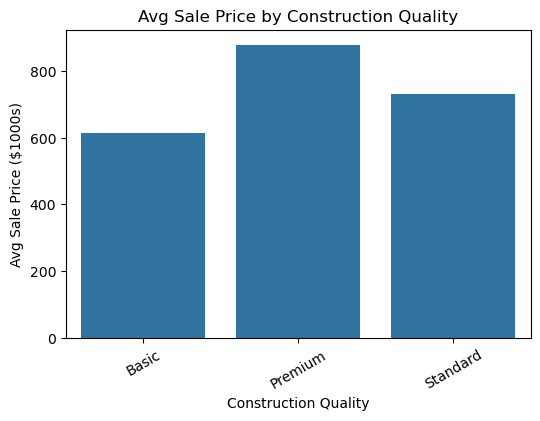

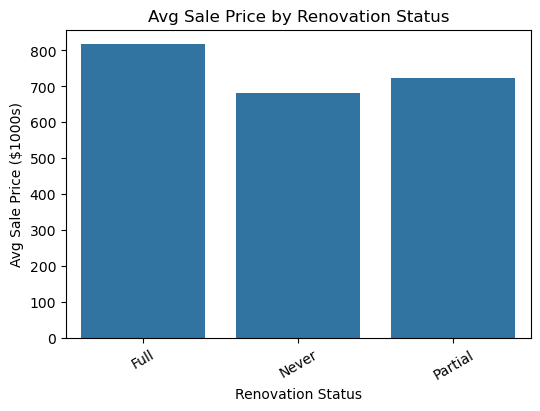

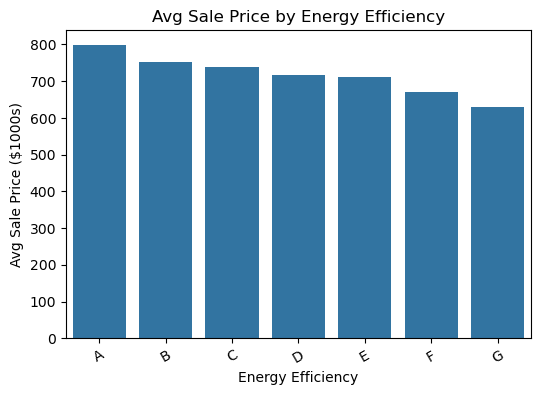

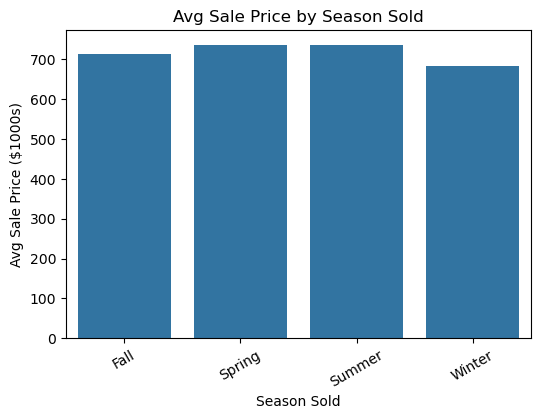

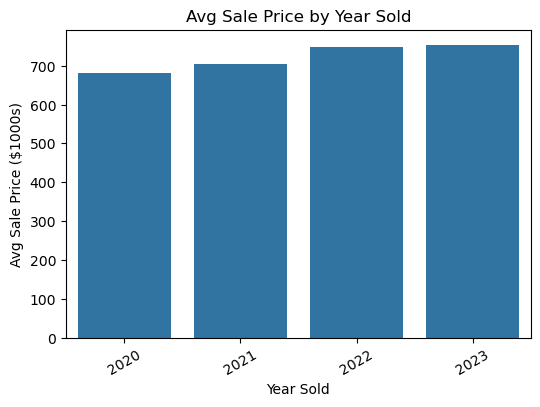

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
quality_features = ['construction_quality', 'renovation_status', 'energy_efficiency']
timing_features = ['season_sold', 'year_sold']

# Plot average sale price for each quality feature
for feature in quality_features:
    plt.figure(figsize=(6, 4))
    avg_prices = df.groupby(feature)['sale_price'].mean().reset_index()
    sns.barplot(data=avg_prices, x=feature, y='sale_price')
    plt.title(f"Avg Sale Price by {feature.replace('_', ' ').title()}")
    plt.ylabel("Avg Sale Price ($1000s)")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.xticks(rotation=30)
    plt.show()

# Plot average sale price for market timing
for feature in timing_features:
    plt.figure(figsize=(6, 4))
    avg_prices = df.groupby(feature)['sale_price'].mean().reset_index()
    sns.barplot(data=avg_prices, x=feature, y='sale_price')
    plt.title(f"Avg Sale Price by {feature.replace('_', ' ').title()}")
    plt.ylabel("Avg Sale Price ($1000s)")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.xticks(rotation=30)
    plt.show()


##### **Create correlation analysis and identify multicollinearity**

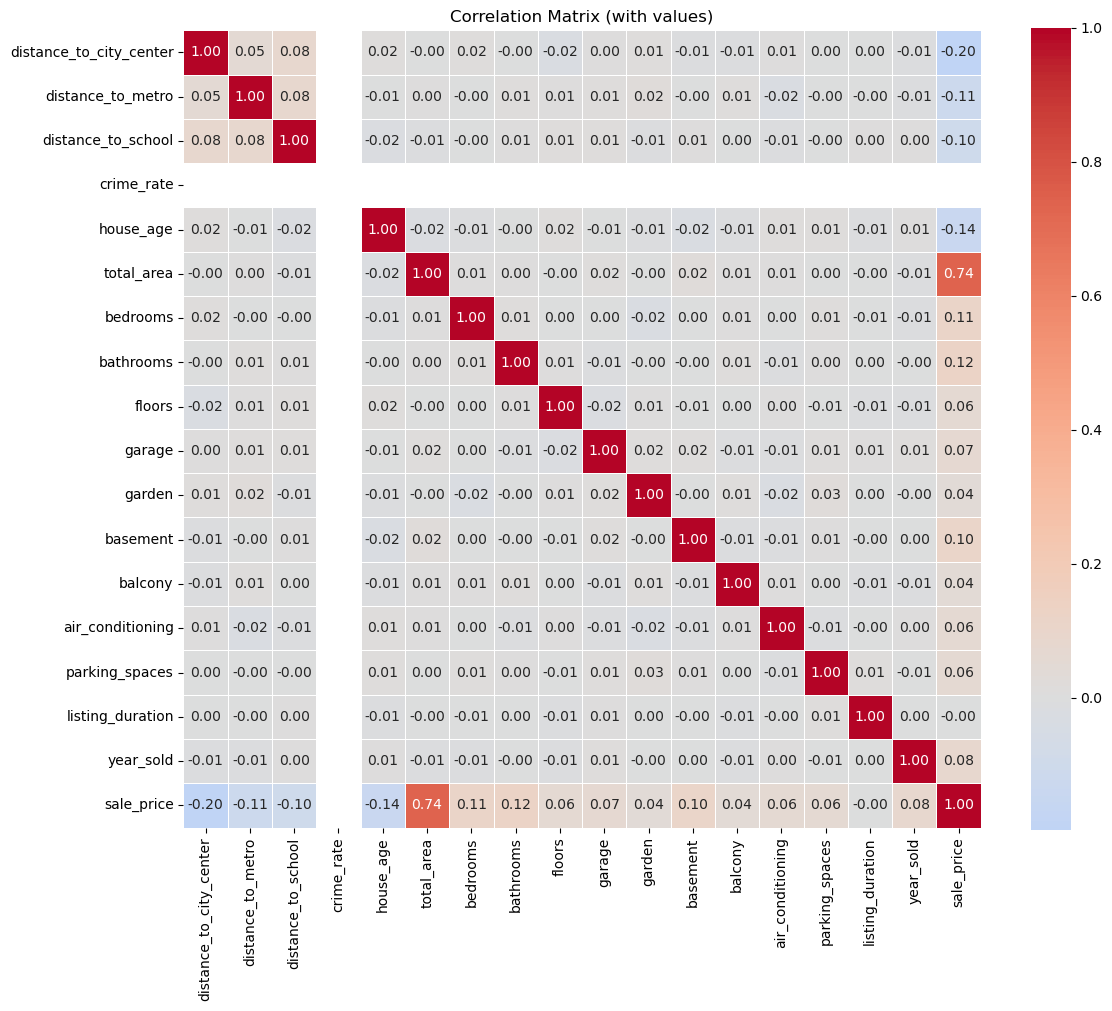


Top features positively correlated with sale_price:
sale_price          1.000000
total_area          0.740486
bathrooms           0.122902
bedrooms            0.112459
basement            0.102643
year_sold           0.081629
garage              0.070667
parking_spaces      0.063897
floors              0.059866
air_conditioning    0.058422
Name: sale_price, dtype: float64

Top features negatively correlated with sale_price:
distance_to_city_center   -0.197500
house_age                 -0.144916
distance_to_metro         -0.113570
distance_to_school        -0.100161
listing_duration          -0.000285
Name: sale_price, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# A. Correlation heatmap with values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Matrix (with values)")
plt.tight_layout()
plt.show()

# B. Show top correlated features
print("\nTop features positively correlated with sale_price:")
print(corr_matrix['sale_price'].sort_values(ascending=False).head(10))

print("\nTop features negatively correlated with sale_price:")
print(corr_matrix['sale_price'].sort_values().head(5))

## Task 3: Feature Engineering and Preprocessing

##### **Handle categorical variables and create new features**

In [12]:
# drop ID column
df_cleaned = df.drop('property_id', axis=1)

# OPTIONAL: Create new features if wanted
# df_cleaned['price_per_sqft'] = df_cleaned['sale_price'] / df_cleaned['total_area']

# one-hot encode categorical columns
cat_cols = df_cleaned.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)

##### **Address outliers and multicollinearity issues**

In [15]:
# A. Remove outliers using IQR for key numerical features
%pip install statsmodels
from scipy import stats

# choose key continuous features to check for outliers
outlier_cols = ['sale_price', 'total_area', 'distance_to_city_center']
for col in outlier_cols:
    q1 = df_encoded[col].quantile(0.25)
    q3 = df_encoded[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df_encoded = df_encoded[(df_encoded[col] >= lower) & (df_encoded[col] <= upper)]

# B. Check multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop the target
X_temp = df_encoded.drop('sale_price', axis=1)

# ensure all columns are numeric (float64)
X_temp = X_temp.astype(float)

# compute VIFs
vif_data = pd.DataFrame()
vif_data['feature'] = X_temp.columns
vif_data['VIF'] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))


Note: you may need to restart the kernel to use updated packages.
                          feature           VIF
3                      crime_rate  3.620072e+06
39            energy_efficiency_D  2.670603e+00
38            energy_efficiency_C  2.424865e+00
37            energy_efficiency_B  2.173871e+00
23          neighborhood_Lakeside  2.156360e+00
17   neighborhood_Coastal Heights  2.122183e+00
40            energy_efficiency_E  2.117584e+00
18          neighborhood_Downtown  2.078429e+00
25     neighborhood_Mountain View  2.060772e+00
22         neighborhood_Hillcrest  2.047183e+00
30   neighborhood_Sunset District  2.005353e+00
26           neighborhood_Oakwood  2.005295e+00
24     neighborhood_Maple Heights  1.999743e+00
29         neighborhood_Riverside  1.974228e+00
20       neighborhood_Forest Glen  1.935450e+00
19           neighborhood_Elmwood  1.934190e+00
28   neighborhood_Prairie Meadows  1.907767e+00
21       neighborhood_Garden City  1.906832e+00
27       neighborhood_

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (5689, 46) (5689,)
Test shape: (1423, 46) (1423,)


## Task 4: Model Development

##### **Implement Linear Regression Model**

In [17]:
from sklearn.linear_model import LinearRegression

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Optional: print intercept and number of coefficients
print("Intercept:", lr_model.intercept_)
print("Number of coefficients:", len(lr_model.coef_))

Intercept: -56138.50577861864
Number of coefficients: 46


## Task 5: Model Evaluation

##### **Evaluate using MAE, MSE, RMSE, R-squared**

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE):  {mae:.2f}")
print(f"Mean Squared Error (MSE):  {mse:.2f}")
print(f"Root Mean Squared Error:   {rmse:.2f}")
print(f"R-squared (R²):             {r2:.4f}")

Mean Absolute Error (MAE):  98.24
Mean Squared Error (MSE):  15811.27
Root Mean Squared Error:   125.74
R-squared (R²):             0.8680


##### **Create residual plots and compare model performances**

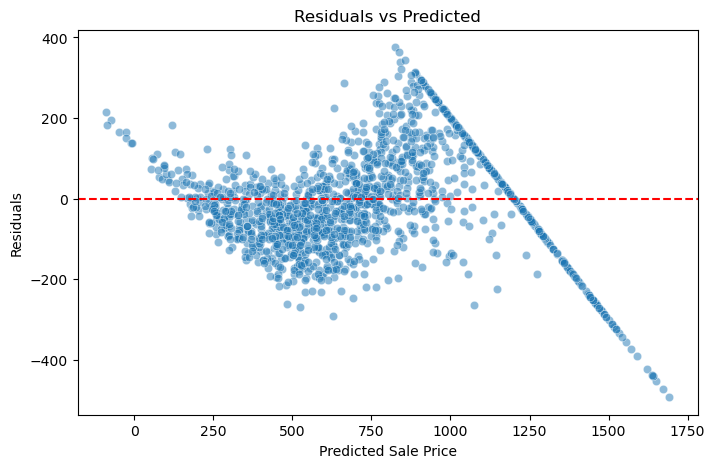

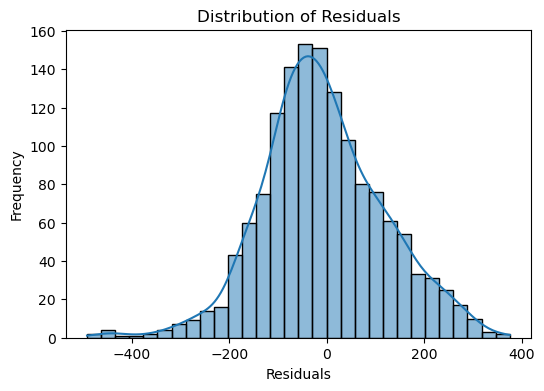

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residuals vs Predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


##### **Select best model and validate on test set**

### ✅ Final Model Selection and Validation

Evaluated the Linear Regression model on the testset using MAE, MSE, RMSE, and R².

- **MAE**: 98.24
- **RMSE**: 125.74
- **R²**: 0.8680

The plots show a reasonably random scatter, meaning there is no major bias.

Given these results, **Linear Regression** is selected as the final model for this task. It performs well on unseen data and captures the majority of the variation in house prices.